First, we install the libraries.

In [104]:
pip install pandas matplotlib seaborn sklearn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [105]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset from Local Directory

In [106]:
from google.colab import files
uploaded = files.upload()

Saving DatasetRegression (1).csv to DatasetRegression (1) (2).csv


# Load Dataset

In [107]:
dataset = pd.read_csv('DatasetRegression (1).csv')

In [108]:
dataset.head(10)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3
5,28980,9/17/1994,,,,astrophysics,0,1,68.45,171.61,...,70.1,,61.4,77.48,In state,1,,,8,3
6,33312,7/27/1994,,,,Anthropology,0,1,68.56,163.96,...,78.98,87.53,76.71,70.79,In state,1,,,9,9
7,40274,5/3/1994,,,,American History,0,1,71.91,222.87,...,,67.31,58.64,65.89,In state,0,,,8,3
8,40390,4/30/1994,,,,Africana studies,1,1,68.84,154.7,...,75.65,76.54,51.14,75.94,In state,0,3,26,,3
9,28942,9/17/1993,,,,,1,1,66.69,180.57,...,68.27,93.88,55.2,78.18,Out of state,,1,13,2,15


# Load Summarize

In [109]:
print(dataset.shape)
print(dataset.head(5))

(435, 23)
     ids        bday enrolldate expgradate Rank                    Major  \
0  43783   3/22/1995                                                       
1  20278    1/1/1995                                          Philosophy   
2  20389  12/31/1994                                                       
3  22820   12/1/1994                             business administration   
4  24559  11/10/1994                                                       

  Gender  Athlete Height  Weight  ... English Reading   Math Writing  \
0      0        0  72.35          ...   88.24    81.5  60.02   81.44   
1      0        0  70.66   179.2  ...   89.45   85.25  70.19   73.27   
2      0        0  70.68  198.52  ...   96.73   86.88   71.2   84.24   
3      1        0         198.34  ...   74.06   88.68  55.89   73.16   
4      1        1  67.43  128.17  ...   82.61    77.3  65.52   80.45   

          State LiveOnCampus HowCommute CommuteTime SleepTime StudyTime  
0      In state           

# Selected Columns

In [110]:
selected_columns = [
    'English',
    'Reading',
    'Math',
    'Writing',
    'SleepTime',
    'StudyTime',
    'Rank'
]

In [111]:
len(selected_columns)

7

Seven columns have been selected for data analysis and predictions.
Based on selected variables, the input variables are follows; English, Reading, Math, Writing, SleepTime, and StudyTime.
Rank is the Target variable.

Let's extract a copy of the data from these columns into a new data frame `dataset`. We can continue to modify further without affecting the original data frame.

In [112]:
rank_df = dataset[selected_columns].copy()

In [113]:
rank_df

,English,Reading,Math,Writing,SleepTime,StudyTime,Rank
0,88.24,81.5,60.02,81.44,7,1,
1,89.45,85.25,70.19,73.27,5,2,
2,96.73,86.88,71.2,84.24,8,7,
3,74.06,88.68,55.89,73.16,2,6,
4,82.61,77.3,65.52,80.45,7,3,
...,...,...,...,...,...,...,...
430,87.72,84.99,65.31,,1,10,4
431,91.01,86.87,70.25,82.67,6,15,4
432,81.05,85.76,58.16,81.87,6,10,4
433,75.59,85.97,66.84,79.35,4,10,4


Let's check for the number of rows and columns using '.shape' method.

In [114]:
rank_df.shape

(435, 7)

In [115]:
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   English    435 non-null    object
 1   Reading    435 non-null    object
 2   Math       435 non-null    object
 3   Writing    435 non-null    object
 4   SleepTime  435 non-null    object
 5   StudyTime  435 non-null    object
 6   Rank       435 non-null    object
dtypes: object(7)
memory usage: 23.9+ KB


Let's convert the object datatypes into float datatype since the selected columns are numeric.

In [116]:
rank_df['English'] = pd.to_numeric(rank_df.English, errors='coerce')
rank_df['Reading'] = pd.to_numeric(rank_df.Reading, errors='coerce')
rank_df['Math'] = pd.to_numeric(rank_df.Math, errors='coerce')
rank_df['Writing'] = pd.to_numeric(rank_df.Writing, errors='coerce')
rank_df['SleepTime'] = pd.to_numeric(rank_df.SleepTime, errors='coerce')
rank_df['StudyTime'] = pd.to_numeric(rank_df.StudyTime, errors='coerce')
rank_df['Rank'] = pd.to_numeric(rank_df.Rank, errors='coerce')

Let's check whether the datatypes of the selected columns have been converted to float.

In [117]:
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   English    409 non-null    float64
 1   Reading    425 non-null    float64
 2   Math       422 non-null    float64
 3   Writing    404 non-null    float64
 4   SleepTime  403 non-null    float64
 5   StudyTime  393 non-null    float64
 6   Rank       406 non-null    float64
dtypes: float64(7)
memory usage: 23.9 KB


The datatypes of the selected columns are now float.

# Remove NA values from the dataset

In [118]:
rank_df.dropna(inplace=True)

In [119]:
rank_df.reset_index(drop=True, inplace=True)

In [120]:
print(rank_df.shape)

(281, 7)


After removing the Nan values, we've remained with 281 rows and 7 columns.

Let's check for Na values in our cleaned dataset.

In [121]:
rank_df.isna()

,English,Reading,Math,Writing,SleepTime,StudyTime,Rank
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
276,False,False,False,False,False,False,False
277,False,False,False,False,False,False,False
278,False,False,False,False,False,False,False
279,False,False,False,False,False,False,False


We have confirmed that the selected columns have no Nan values. Therefore, the dataset is ready to be analyzed and visualized.  

#	Visualization of dataset 

## Correlation Matrix

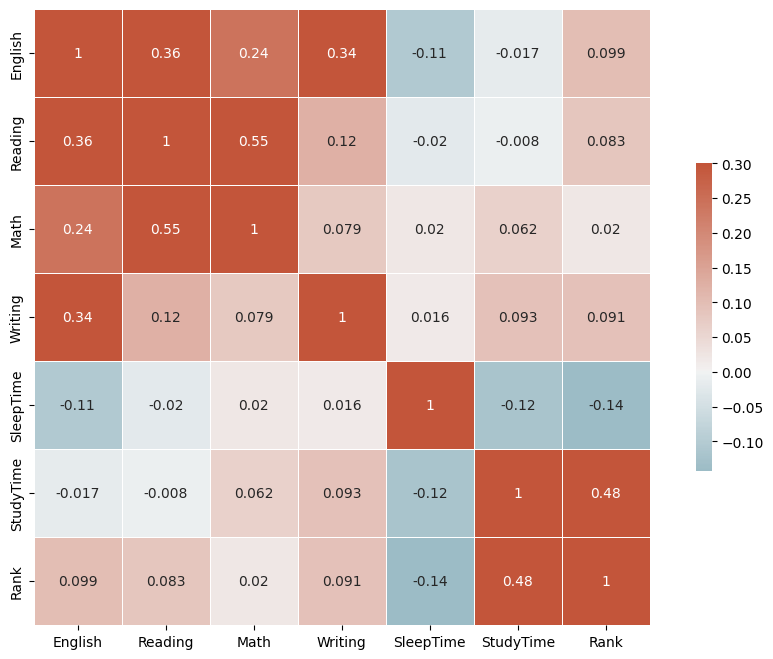

In [122]:
corr = rank_df.corr()
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

The following inferences can be made from the above heatmap:


*   Study time is highly correlated to Rank variable. 
*   There exist a low correlation between mathematics and rank.



In [123]:
Rank_counts = rank_df.Rank.value_counts()

In [124]:
Rank_counts

Rank
1.0    100
3.0     70
2.0     68
4.0     43
Name: count, dtype: int64

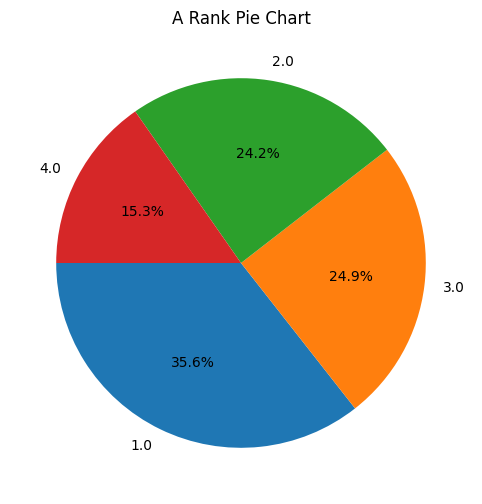

In [125]:
plt.figure(figsize=(12,6))
plt.title('A Rank Pie Chart')
plt.pie(Rank_counts, labels=Rank_counts.index, autopct='%1.1f%%', startangle=180);

<Axes: title={'center': 'A Bar Chart of StudyTime vs. Rank'}, xlabel='StudyTime', ylabel='Rank'>

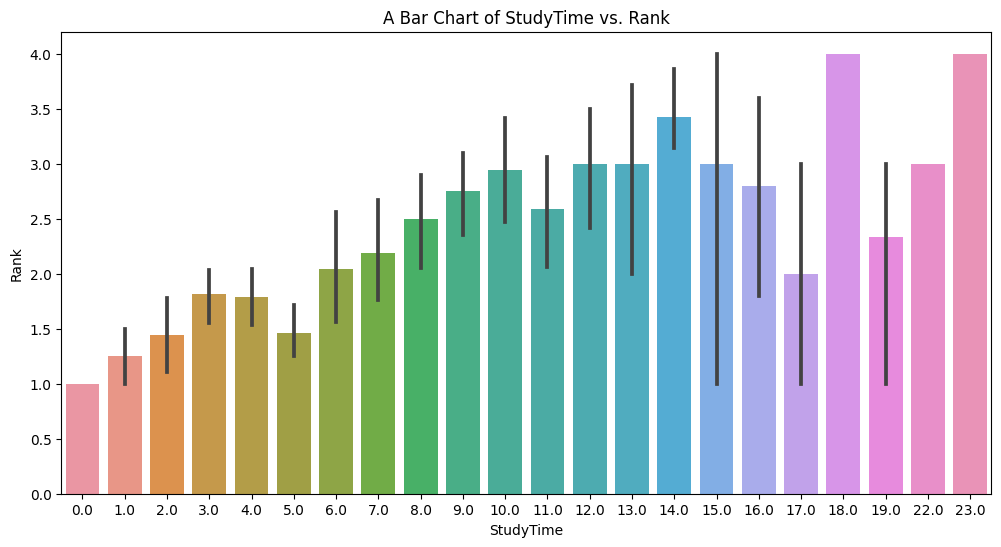

In [126]:
plt.figure(figsize=(12,6))
plt.title('A Bar Chart of StudyTime vs. Rank')
sns.barplot(data=rank_df, x='StudyTime', y='Rank')

# Segregate Dataset into Input X & Output Y

In [127]:
X = rank_df.drop('Rank', axis='columns')

In [128]:
X

,English,Reading,Math,Writing,SleepTime,StudyTime
0,81.60,75.60,65.36,76.07,8.0,3.0
1,78.85,86.92,68.53,71.42,5.0,3.0
2,76.63,84.19,65.25,72.61,8.0,4.0
3,75.20,81.54,66.66,85.38,5.0,5.0
4,81.74,86.41,66.21,76.24,9.0,8.0
...,...,...,...,...,...,...
276,83.53,80.02,66.33,84.21,5.0,12.0
277,91.01,86.87,70.25,82.67,6.0,15.0
278,81.05,85.76,58.16,81.87,6.0,10.0
279,75.59,85.97,66.84,79.35,4.0,10.0


In [129]:
Y = rank_df['Rank']

In [130]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
276    4.0
277    4.0
278    4.0
279    4.0
280    4.0
Name: Rank, Length: 281, dtype: float64

# Train the dataset 

In [131]:
model = LinearRegression()

In [132]:
model.fit(X,Y)

LinearRegression()

In [133]:
predictions = model.predict(X)

In [134]:
predictions

array([1.48752528, 1.66735061, 1.65868711, 1.84985494, 2.20162004,
       1.7548908 , 2.79472922, 1.47874518, 1.56095775, 1.80653975,
       2.25113511, 1.79646859, 2.0319664 , 1.27203154, 3.65600099,
       1.98262646, 1.93191013, 1.92107333, 1.89641249, 1.84244985,
       2.73790953, 1.40308907, 1.59522341, 3.25437936, 1.17981985,
       1.76228501, 1.5539765 , 1.40545138, 1.73119947, 2.36275966,
       2.50032214, 2.14048941, 2.74761992, 1.8004452 , 2.10776894,
       2.37190198, 1.94677972, 1.41691233, 1.59990153, 2.04928079,
       1.64670459, 2.28215141, 2.6342793 , 2.5187477 , 1.79057008,
       1.68381639, 1.66926382, 1.94469379, 1.72859896, 1.31929832,
       1.93100305, 1.50948303, 1.84946635, 1.54196992, 2.47229572,
       2.12076002, 1.70169065, 2.01553088, 2.58886422, 2.56248316,
       1.92713841, 2.24193941, 1.49466387, 1.80155584, 1.55731519,
       1.68216819, 1.62621761, 1.49896606, 1.9127088 , 2.04081345,
       1.70371328, 1.82140372, 2.17501474, 3.57352772, 1.90039

# Predicted Rank

In [135]:
X= [[81.60, 75.60, 65.36, 76.07, 8.0, 3.0]]
input_variables = X
PredictModelResult = model.predict(input_variables)
PredictModelResult

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.48752528])

In [136]:
X= [[91.01, 86.86, 70.25, 82.67, 6.0, 15.0]]
input_variables = X
PredictModelResult = model.predict(input_variables)
PredictModelResult

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.24015136])

In [137]:
X= [[75.65, 77.24, 60.24, 75.23, 2.0, 10.0]]
input_variables = X
PredictModelResult = model.predict(input_variables)
PredictModelResult

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.52662449])

# Coefficient and Intercept

In [138]:
coefficients = model.coef_

In [139]:
intercept = model.intercept_

In [140]:
# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.01245474  0.01439185 -0.01058457  0.00330728 -0.03336401  0.11971477]
Intercept: -0.26881528302428315


# Check for Model Accuracy

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
train_rmse = mean_squared_error(Y, predictions, squared=False)

In [143]:
print('Model Loss:', train_rmse)

Model Loss: 0.9390271912473127
